## Import Statements

In [166]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate, UnitaryGate

The code in this Jupyter Notebook covers the three applications of quantum entanglement covered in the "Entanglement in Action" chapter of the Qiskit notebook: quantum teleportation, superdense coding, and the CHSH game. 

## Quantum Teleportation

**Problem:** Alice and Bob each have a qubit, labeled $A$ and $B$ respectively. These qubits are entangled in the Bell state $| \phi^+ \rangle = \frac{1}{\sqrt 2} | 00 \rangle + \frac{1}{\sqrt 2} | 11 \rangle$. Suppose Alice has another qubit $Q$ whose state she wishes to transfer to Bob. How can she accomplish this?

Note: Since the No Cloning Theorem forbids the creation of an independent and identical copy of a given quantum state. This means that if we are to transmit the state of $Q$, we will inevitably destroy $Q$ in the process.

**Solution:** Create the following circuit shown below

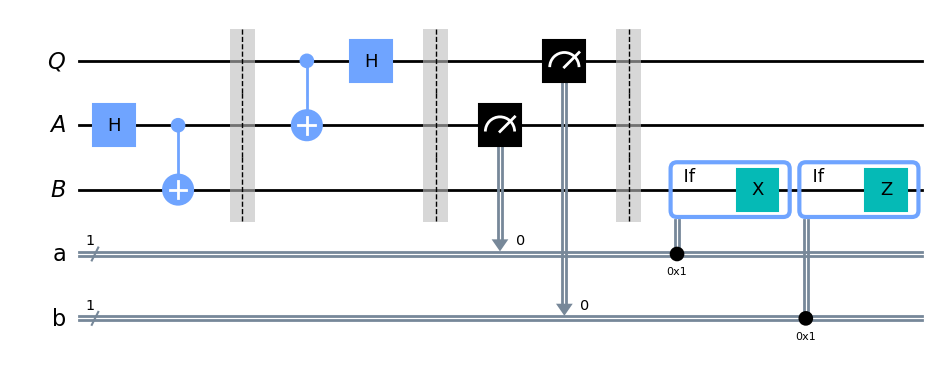

In [167]:
# qubit to transfer
Q = QuantumRegister(1, "Q")

# entangled bits
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")

# classical registers that store measurements
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

# initialize circuit
circuit = QuantumCircuit(Q, A, B, a, b)

# initialize phi^+ bell state for A and B
circuit.h(A)
circuit.cx(A, B)
circuit.barrier()

# transportation protocol
circuit.cx(Q, A)
circuit.h(Q)
circuit.barrier()
circuit.measure(A, a)
circuit.measure(Q, b)
circuit.barrier()
with circuit.if_test((a, 1)):
    circuit.x(B)
with circuit.if_test((b, 1)):
    circuit.z(B)
display(circuit.draw('mpl'))

## Explanation

### Entangling A and B

The Hadamard and CNOT gates before the first barrier are simply there to initialize a $|\phi^+\rangle$ Bell state between qubits $A$ and $B$, since it is assumed that the registers start in the state $|0\rangle$. Effectively, the Hadamard gate maps $|0 \rangle \mapsto \frac{1}{\sqrt 2}|0 \rangle + \frac{1}{\sqrt 2}|1 \rangle$ for qubit A. Taking the tensor product of qubits $A$ and $B$ at this stage, we have that

$$|AB\rangle = (\frac{1}{\sqrt 2}|0 \rangle + \frac{1}{\sqrt 2}|1 \rangle) \otimes |0 \rangle = \frac{1}{\sqrt 2}|00 \rangle + \frac{1}{\sqrt 2}|10 \rangle$$

Applying the CNOT gate, we have that

$$CX|AB\rangle = \begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}(\frac{1}{\sqrt 2}|00 \rangle + \frac{1}{\sqrt 2}|10 \rangle)$$

This gives us our new value for the AB qubit system, which is simply

$$|AB\rangle = \frac{1}{\sqrt 2}|00 \rangle + \frac{1}{\sqrt 2}|11 \rangle = |\phi^+\rangle$$

### Teleportation Protocol

To show that the teleportation protocol works, we can show that by applying the unitary transformations in the order specified, we can effectively transform qubit $B$ into the state of qubit $Q$.

Let $|Q\rangle = \alpha |0\rangle + \beta |1\rangle$ and let $|QAB\rangle$ represent the system of all 3 qubits. At the start of this protcol, after qubits $A$ and $B$ are entangled, this state is given by

$$|QAB\rangle = |Q\rangle \otimes |AB\rangle = (\alpha |0\rangle + \beta |1\rangle) \otimes (\frac{1}{\sqrt 2}|00 \rangle + \frac{1}{\sqrt 2}|11 \rangle)$$

$$= (\alpha |0\rangle + \beta |1\rangle) \otimes (\frac{1}{\sqrt 2}|00 \rangle + \frac{1}{\sqrt 2}|11 \rangle)$$

$$= \frac{\alpha}{\sqrt 2}|000 \rangle + \frac{\alpha}{\sqrt 2}|011 \rangle + \frac{\beta}{\sqrt 2}|100 \rangle + \frac{\beta}{\sqrt 2}|111 \rangle$$

We then apply the CNOT gate using Q as the control and A as the target. Let this new state be denoted $|\pi_1\rangle$

$$|\pi_1\rangle = CX|QAB\rangle$$

$$= \frac{\alpha}{\sqrt 2}|000 \rangle + \frac{\alpha}{\sqrt 2}|011 \rangle + \frac{\beta}{\sqrt 2}|110 \rangle + \frac{\beta}{\sqrt 2}|101 \rangle$$

Applying the Hadamard gate to Q gives us the state $|\pi_2\rangle$

$$|\pi_2 \rangle = H|\pi_1\rangle = \frac{\alpha}{\sqrt 2}|+00 \rangle + \frac{\alpha}{\sqrt 2}|+11 \rangle + \frac{\beta}{\sqrt 2}|-10 \rangle + \frac{\beta}{\sqrt 2}|-01 \rangle$$

$$= \frac{\alpha}{\sqrt 2}(\frac{1}{\sqrt 2}|0 \rangle + \frac{1}{\sqrt 2}|1 \rangle) \otimes |00 \rangle + \frac{\alpha}{\sqrt 2}(\frac{1}{\sqrt 2}|0 \rangle + \frac{1}{\sqrt 2}|1 \rangle) \otimes |11 \rangle + \frac{\beta}{\sqrt 2}(\frac{1}{\sqrt 2}|0 \rangle - \frac{1}{\sqrt 2}|1 \rangle) \otimes|10 \rangle + \frac{\beta}{\sqrt 2}(\frac{1}{\sqrt 2}|0 \rangle - \frac{1}{\sqrt 2}|1 \rangle) \otimes|01 \rangle$$

$$= \frac{\alpha}{2}|000 \rangle + \frac{\alpha}{2}|100 \rangle + \frac{\alpha}{2}|011 \rangle + \frac{\alpha}{2}|111 \rangle + \frac{\beta}{2}|010 \rangle - \frac{\beta}{2}|110 \rangle + \frac{\beta}{2}|001 \rangle - \frac{\beta}{2}|101 \rangle$$

Rearranging the order of states from $QAB$ to $BAQ$, we can write $|\pi_2\rangle$ as

$$|\pi_2\rangle = \frac12(\alpha|0\rangle + \beta|1\rangle)|00\rangle + \frac12(\alpha|0\rangle - \beta|1\rangle)|01\rangle + \frac12(\alpha|1\rangle + \beta|0\rangle)|10\rangle + \frac12(\alpha|1\rangle - \beta|0\rangle)|11\rangle$$

We can observe that the norm of the probability amplitude of $|AQ\rangle$ squared is the same for all the different possible permutations of $A$ and $Q$, meaning that they must all have the same probability. This is supported by the fact that the norm squared for each outcome is given by

$$\frac{|\alpha|^2 + |\beta|^2}{4} = \frac{1}{4}$$

which means that each of the four outcomes has a $\frac14$ chance.

We can observe that when any pair of $Q, A$ is measured, the state of the system will collapse to some state reminiscent of the original state $Q$ was in. In other words, the state of $B$ will be transformed into something like that of $Q$ at the beginning of the protocol. However, as we can see, these states do not match the original state of $Q$. Consequently, we will have to perform some additional operations on $B$ in order to recreate the original state of $Q$ based on the measurement outcomes of $A$ and $Q$. Let the classical measurements of $A$ and $Q$ be represented by $a$ and $b$, respectively. We have four cases to consider:

**Case 1: $ab = 00$**

When $|\pi_2 \rangle$ is measured, we have that the state of $B$ is given by

$$|B \rangle_{00} = \alpha|0\rangle + \beta|1\rangle$$

Since this is just the original state of $Q$, no additional steps are required.


**Case 2: $ab = 01$**

When $|\pi_2 \rangle$ is measured, we have that the state of $B$ is given by

$$|B \rangle_{01} = \alpha|0\rangle - \beta|1\rangle$$

This is the original state of $Q$, but the $|1\rangle$ component is negated. Therefore, we need to apply a $Z$ gate to convert this back to the state of $Q$.

$$Z|B \rangle_{01} = \alpha|0\rangle + \beta|1\rangle$$


**Case 3: $ab = 10$**

When $|\pi_2 \rangle$ is measured, we have that the state of $B$ is given by

$$|B \rangle_{10} = \alpha|1\rangle + \beta|0\rangle$$

This is the original state of $Q$, but the $|0\rangle$ and $|1\rangle$ components are flipped. Therefore, we need to perform the NOT operation given by $X$ to get the original state of $Q$.

$$X|B \rangle_{10} = \alpha|0\rangle + \beta|1\rangle$$


**Case 4: $ab = 11$**

When $|\pi_2 \rangle$ is measured, we have that the state of $B$ is given by

$$|B \rangle_{11} = \alpha|1\rangle - \beta|0\rangle$$

This is just $|B \rangle_{10}$ but the $|0\rangle$ component is negated. Therefore, we need to first perform a NOT operation and then perform $Z$.

$$ZX|B \rangle_{11} = \alpha|0\rangle + \beta|1\rangle$$

This case analysis is handled by the checks on the classical registers past the third barrer in the circuit diagram above.

### Testing the quantum teleportation protocol

The calculations below are performed for 3 different states of $Q$. These are as follows:

$$|Q_1\rangle = |1\rangle$$

$$|Q_2\rangle = |+\rangle$$

$$|Q_3\rangle = \frac{1}{\sqrt 3}|0\rangle + \sqrt \frac{2}{3} |1\rangle$$

In the following graphs, the qubits will be written in the order $BQA$ since the most recently measured qubits are placed on the left. This means that for $Q_1$, we should expect that every measurement of $|BQA\rangle$ should have 1 in the leftmost place. For $Q_2$, we should expect that roughly half of the measurements of $|BQA\rangle$ should have 0 in the leftmost place while the other half will have 1. Lastly, for $Q_3$, we should expect a third of the measurement to have 0 in the leftmost place while the other two-thirds have 1.

Note: Quantum registers are initialized to $|0\rangle$ in Qiskit

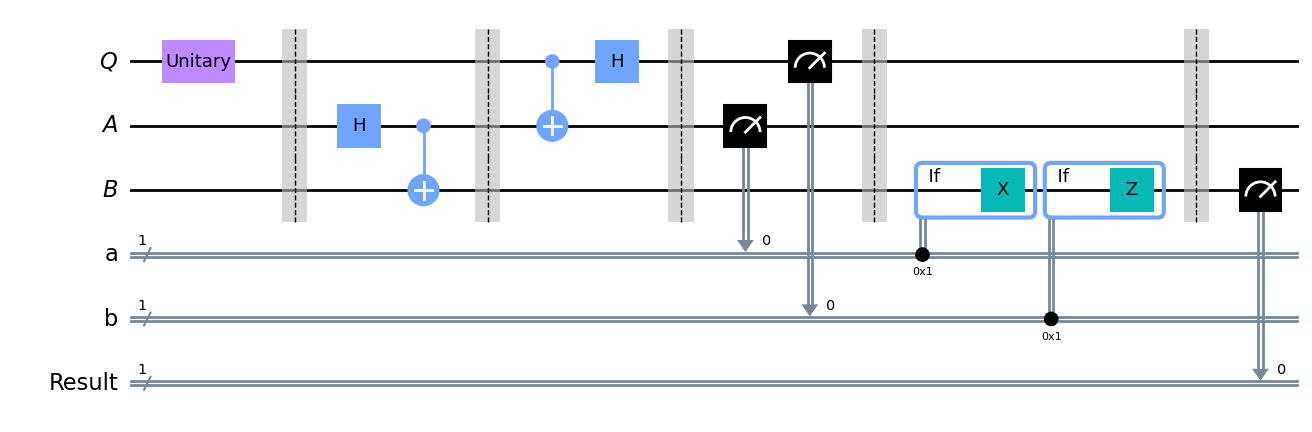

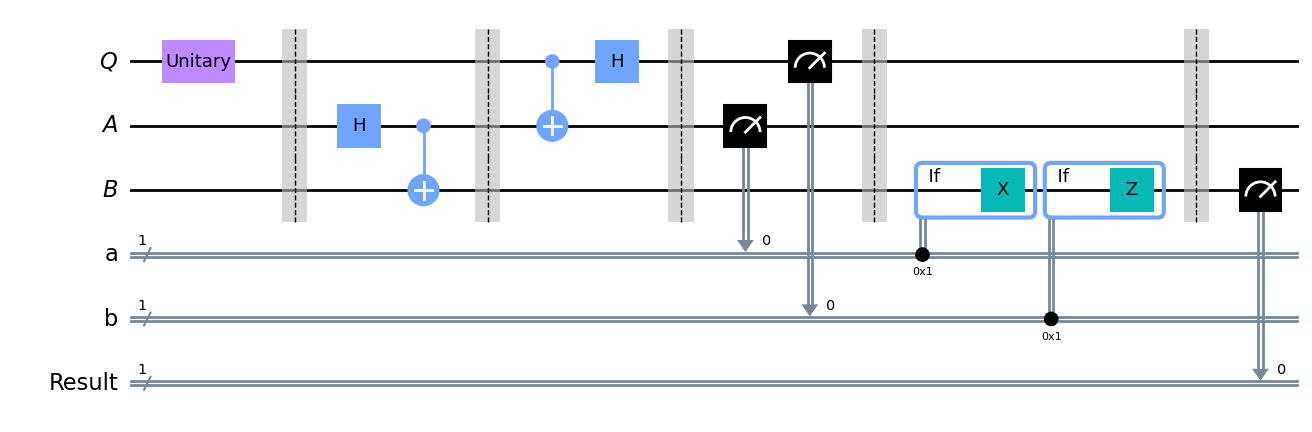

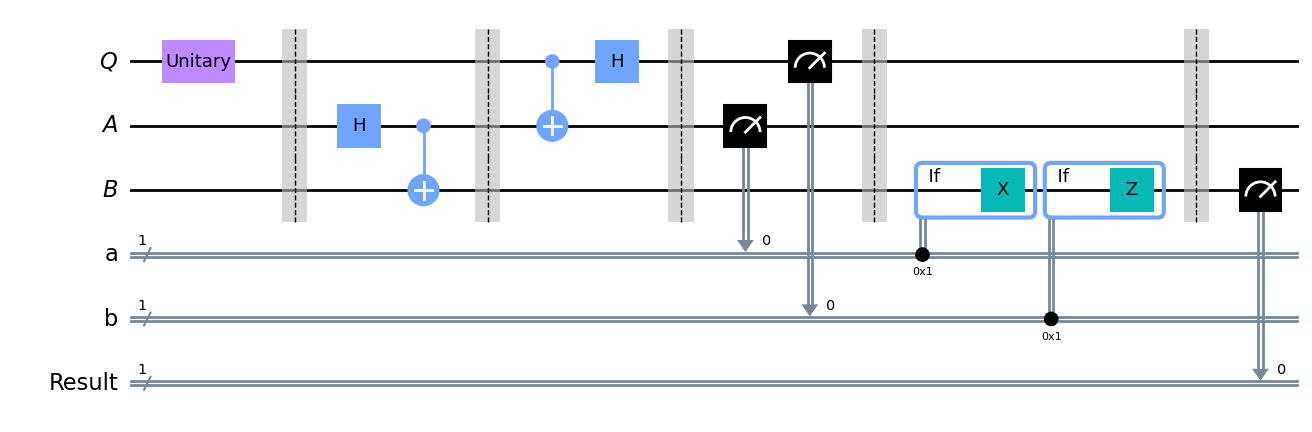

In [168]:
# different initializations of Q
GATES = [
    [[0, 1],
    [1, 0]],
    [[1/np.sqrt(2), 1/np.sqrt(2)],
    [1/np.sqrt(2), -1/np.sqrt(2)]],
    [[1/np.sqrt(3), -np.sqrt(2)/np.sqrt(3)],
    [np.sqrt(2)/np.sqrt(3), 1/np.sqrt(3)]],
]

tests = []
for i in range(0, 3):
    tests.append(QuantumCircuit(Q, A, B, a, b))
    tests[i].append(UnitaryGate(GATES[i]), Q)
    tests[i].barrier()
    tests[i] = tests[i].compose(circuit)
    tests[i].barrier()
    result = ClassicalRegister(1, "Result")
    tests[i].add_register(result)
    tests[i].measure(B, result)
    display(tests[i].draw('mpl'))

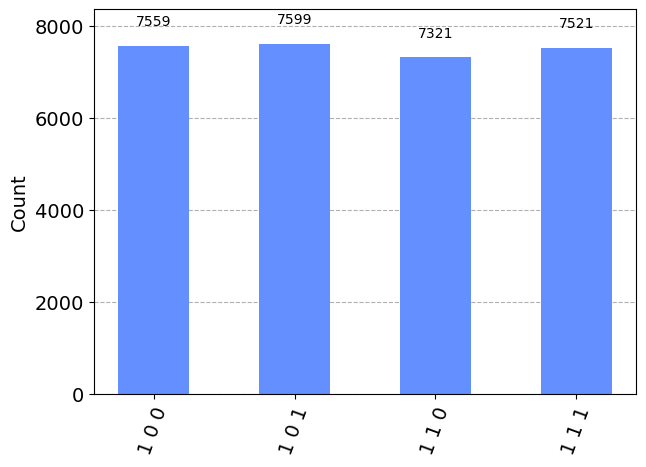

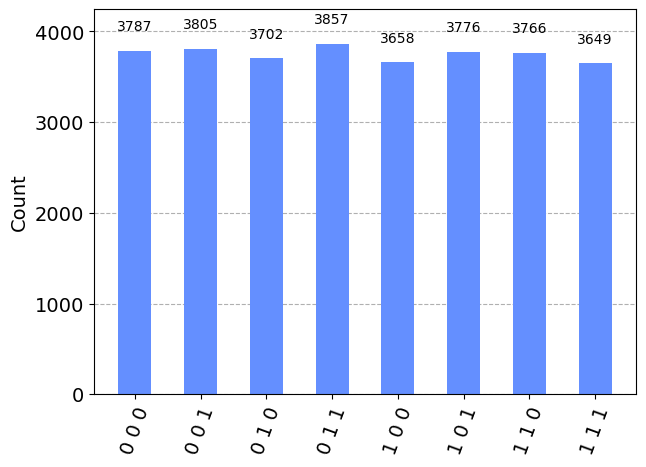

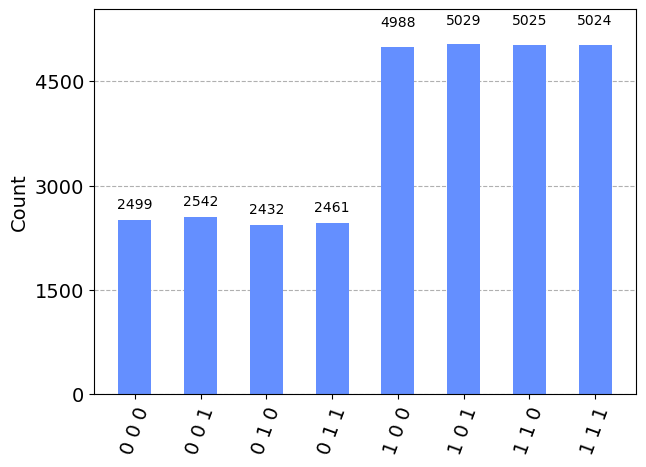

In [169]:
for i in range(0, 3):
    result = AerSimulator().run(tests[i], shots=30000).result()
    statistics = result.get_counts()
    display(plot_histogram(statistics))

## Superdense Coding

**Problem:** Alice wants to send two classical bits of information, $c$ and $d$, to Bob using only one qubit. Suppose Alice and Bob each have a qubit ($A$ and $B$, respectively) that is entangled with the other in the  $|\phi^+\rangle$ Bell state. How can we achieve this?

**Solution:** We can develop the following circuit (see below for explanation)

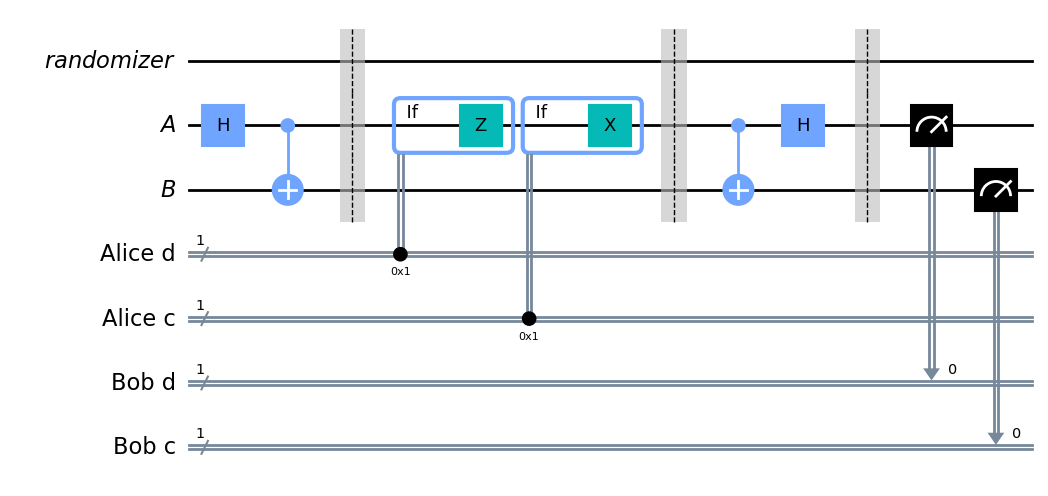

In [170]:
# randomizer to initalize classical bits
randomizer = QuantumRegister(1, "randomizer")

# classical bits to transfer
c = ClassicalRegister(1, "Alice c")
d = ClassicalRegister(1, "Alice d")

# entangled bits
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")

# result bits
result1 = ClassicalRegister(1, "Bob c")
result2 = ClassicalRegister(1, "Bob d")

# initialize circuit
circuit = QuantumCircuit(randomizer, d, c, A, B, result2, result1)

# initialize phi^+ entanglement
circuit.h(A)
circuit.cx(A, B)
circuit.barrier()

# encode (c, d) in new Bell state
with circuit.if_test((d, 1)):
    circuit.z(A)
with circuit.if_test((c, 1)):
    circuit.x(A)
circuit.barrier()

# decode encoding
circuit.cx(A, B)
circuit.h(A)
circuit.barrier()
circuit.measure(A, result2)
circuit.measure(B, result1)

display(circuit.draw('mpl'))

In the code above, the $H$ and $CX$ gates performed before the first barrier serve to intialize the $|\phi^+\rangle$ state as before. The randomizer was just added to generate random combinations of classical bits for Alice to send, so this register can be ignored.

### Superdense Coding Protocol

The idea behind this protocol is simple. Since Alice is sending 2 classical bits, we need to map these 4 different possibilities to different entangled states and then subsequently decode them to obtain the original pair of classical bits sent. To do this, we can create mappings from each pair of classical bits (00, 01, 10, 11) to the 4 Bell states ($|\phi^+\rangle, |\phi^-\rangle, |\psi^+\rangle, |\psi^-\rangle$). This is easy to do by simply having qubits $A$ and $B$ be entangled in a Bell state and perform operations on the entangled bits to obtain the other Bell states. using this technique, we can create the following mappings:

$$00 \mapsto |\phi^+\rangle$$

$$01 \mapsto (\mathbb 1 \otimes Z)|\phi^+\rangle = |\phi^-\rangle$$

$$10 \mapsto (\mathbb 1 \otimes X)|\phi^+\rangle = |\psi^+\rangle$$

$$11 \mapsto (\mathbb 1 \otimes XZ)|\phi^+\rangle = |\psi^-\rangle$$

In other words, if the pairs of bits above represent $cd$, then if $d = 1$, apply $Z$, and if $c = 1$, apply $X$ (checks are performed in this order).

To decode these mappings, we can perform an operation that resembles the inverse of the operations used to convert $|00\rangle_{BA} \mapsto |\phi^+\rangle$ at the beginning of the circuit during the initialization steps. By performing these operations on the Bell states, we can consequently arrive at one of the standard basis states for a quantum system of 2 qubits, which when measured will always yield 00, 01, 10, or 11.

Since we first applied the $H$ operation followed by $CX$ to convert basis quantum states to a Bell states, we must now perform $CX^T$ (which is just $CX$) using $A$ as the control and $B$ as the target, followed by $H^T$ on A (which is just $H$) to convert the Bell state back into a basis quantum state.

$$|\phi^+\rangle \mapsto |00\rangle$$

$$|\phi^-\rangle \mapsto |01\rangle$$

$$|\psi^+\rangle \mapsto |10\rangle$$

$$|\psi^-\rangle \mapsto -|11\rangle$$

Measuring any of these states will now yield the original classical bits $cd$ that were sent by Alice with 100% certainty.

### Testing the Superdense coding protocol

Here we are using a randomizer to (uniformly) randomly choose the two classical bits Alice will send to Bob via the protocol. If the protocol works correctly, we expect to see a uniform distribution of measurements where the leftmost two bits should match the rightmost two bits (leftmost represents Bob's $cd$ while the rightmost represents Alice's $cd$)

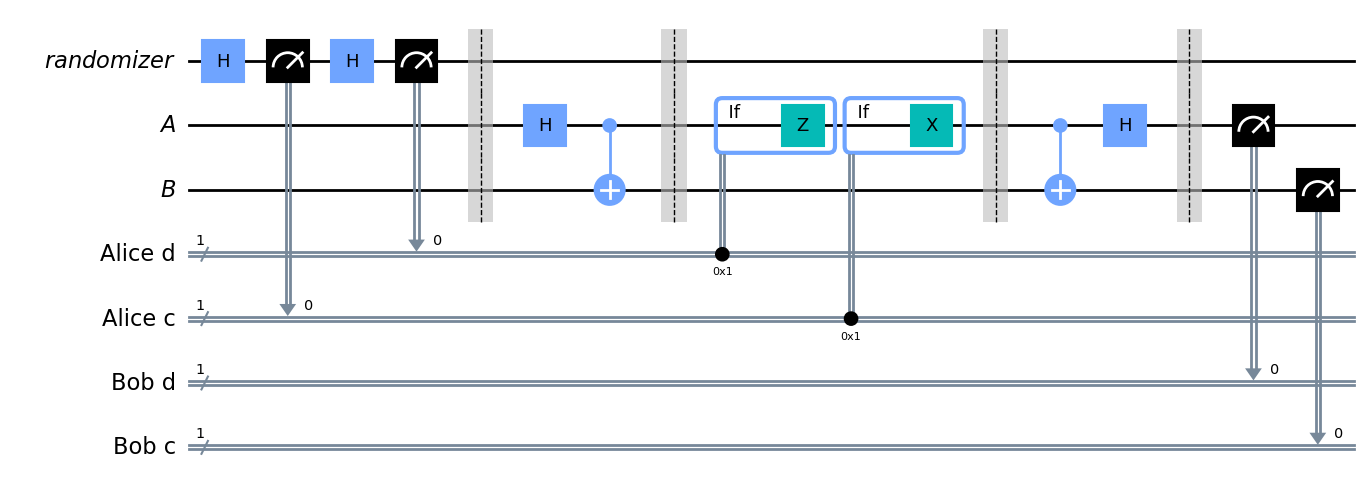

In [171]:
test = QuantumCircuit(randomizer, d, c, A, B, result2, result1)
test.h(randomizer)
test.measure(randomizer, c)
test.h(randomizer)
test.measure(randomizer, d)
test.barrier()
test = test.compose(circuit)
display(test.draw('mpl'))

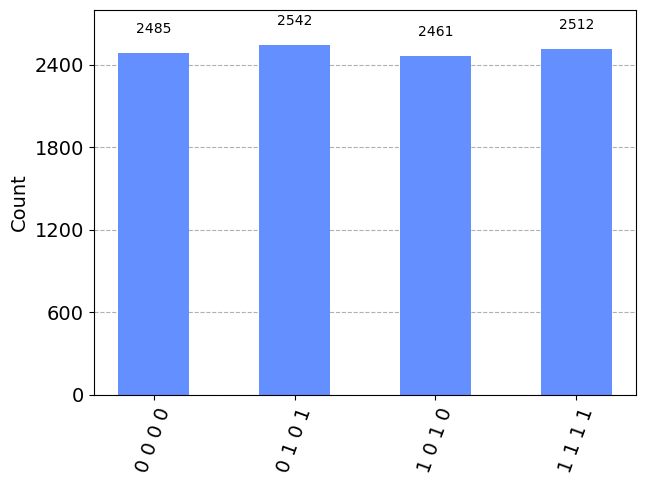

In [172]:
result = AerSimulator().run(test, shots=10000).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

## CHSH Game

**Problem:** Alice and Bob are each in separate rooms and cannot communicate with each other directly. A referee gives each person a question, $x$ and $y$, each represented by a bit (0 or 1). Alice and Bob each provide their own binary answers $a$ and $b$ (also represented by 0 or 1). For Alice and Bob to win the game, $a \oplus b = x \land y$. Suppose that Alice and Bob prepared an entangled quantum state before the game. What is the optimal quantum strategy for Alice and Bob to win?

**Solution:** See the circuits below

In [173]:
def chsh_circuit(x, y):
    """
    Args
        x: binary question asked to Alice
        y: binary question asked to Bob
    Returns
        Quantum circuit that performs operations on each qubit
        based on the questions provided assuming that only Alice
        knows question x and Bob knows question y.
    """
    # entangled bits
    A = QuantumRegister(1, "A")
    B = QuantumRegister(1, "B")

    # result bits
    results = ClassicalRegister(2, "Answers")

    # initialize circuit
    circuit = QuantumCircuit(A, B, results)

    # initialize phi^+ entanglement
    circuit.h(A)
    circuit.cx(A, B)
    circuit.barrier()
    
    if x:
        circuit.ry(-np.pi/2, A)
    if not y:
        circuit.ry(-np.pi/4, B)
    else:
        circuit.ry(np.pi/4, B)

    # measure qubits and store them in results
    circuit.measure(A, results[0])
    circuit.measure(B, results[1])

    return circuit

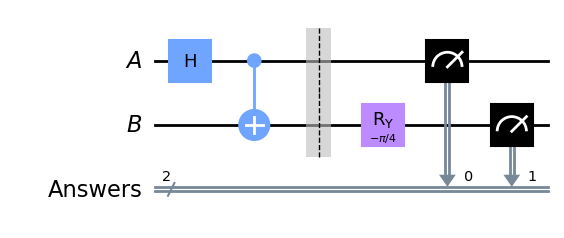

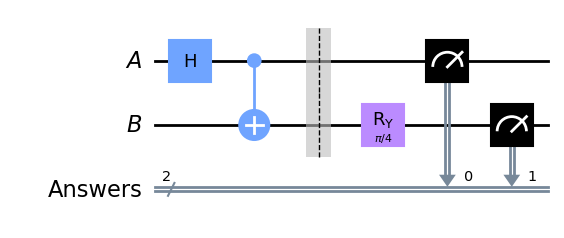

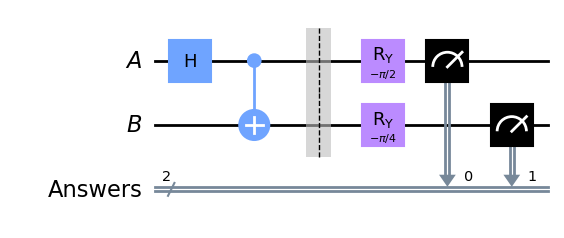

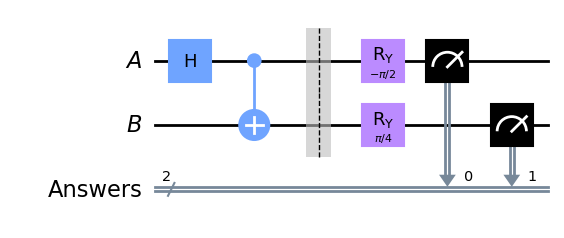

In [174]:
display(chsh_circuit(0, 0).draw('mpl'))
display(chsh_circuit(0, 1).draw('mpl'))
display(chsh_circuit(1, 0).draw('mpl'))
display(chsh_circuit(1, 1).draw('mpl'))

### CHSH strategies
Since the referee asks two binary questions $(x, y)$ to Alice and Bob, respectively, there are four possible combinations of questions. Let $a, b$ be the answers to questions $x$ and $y$, respectively. The win and loss condition are detailed below:

|($x$, $y$)| Win        | Loss     |
|:-:|:---:|:--------:|
|00|  $a$ $=$ $b$   | $a$ $\ne$ $b$|
|01|  $a$ $=$ $b$   | $a$ $\ne$ $b$|
|10|  $a$ $=$ $b$   |$a$ $\ne$ $b$|
|11|  $a$ $\ne$ $b$ | $a$ $=$ $b$  |

With classical strategies, the success rate is ultimately capped at 75% since if the questions are chosen randomly, the best strategies (such as always having both people choose 0 every time), these strategies can either only be successful in 3 of the 4 cases at best.

However, with quantum strategies, it is possible to improve upon this success rate. Suppose Alice and Bob each have a qubit that is entangled with the other in the $|\phi^+\rangle$ Bell state. The optimal strategy is then as follows:

Define the unitary operation

$$U_\theta = \begin{pmatrix}
    \cos \theta & \sin \theta \\
    -\sin \theta& \cos \theta
\end{pmatrix}$$

Alice:

If the question $x = 0$, then leave the qubit $A$ as is. If the question $x = 1$, then apply the operation $U_{\pi/4}$ to qubit $A$. After the necessary operations are applied, the qubit $A$ is measured to get the response $a$.

Bob:

If the question $y = 0$, then apply the transformation $U_{\pi/8}$ to qubit $B$. If the question $y = 1$, then apply the operation $U_{-\pi/8}$ to qubit $B$. After the necessary operations are applied, the qubit $B$ is measured to get the response $b$.

Using this quantum strategy, the win rate increases from 75% to ~85%, strictly better than the classical strategy. To see why this is, let's look at the probability of victory for each of the four possible pairs of questions.

**Case 1: $(x, y) = (0, 0)$**

In this case, the state of our system is as follows:

$$(U_{\pi/8} \otimes \mathbb 1)|BA\rangle = (U_{\pi/8} \otimes \mathbb 1)(\frac{1}{\sqrt 2}|00\rangle + \frac{1}{\sqrt 2}|11\rangle)$$

$$= \frac{1}{\sqrt 2}(\cos \frac \pi 8|0\rangle - \sin\frac \pi 8|1\rangle)|0\rangle + \frac{1}{\sqrt 2}(\sin \frac \pi 8|0\rangle + \cos\frac \pi 8|1\rangle)|1\rangle$$

$$= \frac{1}{\sqrt 2}(\cos \frac \pi 8|00\rangle - \sin\frac \pi 8|10\rangle) + \frac{1}{\sqrt 2}(\sin \frac \pi 8|01\rangle + \cos\frac \pi 8|11\rangle)$$

In this case, the win condition is that $a = b$. This means that measuring either $|00\rangle$ or $|11\rangle$ will result in a win.

$$\operatorname{Pr}(\text{win}) = \operatorname{Pr}(|00\rangle) + \operatorname{Pr}(|11\rangle) = \frac12\cos^2 \frac \pi 8 + \frac12\cos^2 \frac \pi 8 = \cos^2 \frac \pi 8 \approx 0.854$$


**Case 2: $(x, y) = (0, 1)$**

In this case, the state of our system is as follows:

$$(U_{-\pi/8} \otimes \mathbb 1)|BA\rangle = (U_{-\pi/8} \otimes \mathbb 1)(\frac{1}{\sqrt 2}|00\rangle + \frac{1}{\sqrt 2}|11\rangle)$$

$$= \frac{1}{\sqrt 2}(\cos \frac \pi 8|0\rangle + \sin\frac \pi 8|1\rangle)|0\rangle + \frac{1}{\sqrt 2}(-\sin \frac \pi 8|0\rangle + \cos\frac \pi 8|1\rangle)|1\rangle$$

$$= \frac{1}{\sqrt 2}(\cos \frac \pi 8|00\rangle + \sin\frac \pi 8|10\rangle) + \frac{1}{\sqrt 2}(-\sin \frac \pi 8|01\rangle + \cos\frac \pi 8|11\rangle)$$

In this case, the win condition is that $a = b$. This means that measuring either $|00\rangle$ or $|11\rangle$ will result in a win.

$$\operatorname{Pr}(\text{win}) = \operatorname{Pr}(|00\rangle) + \operatorname{Pr}(|11\rangle) = \frac12\cos^2 \frac \pi 8 + \frac12\cos^2 \frac \pi 8 = \cos^2 \frac \pi 8 \approx 0.854$$


**Case 3: $(x, y) = (1, 0)$**

In this case, the state of our system is as follows:

$$(U_{\pi/8} \otimes U_{\pi/4})|BA\rangle = (U_{\pi/8} \otimes U_{\pi/4})(\frac{1}{\sqrt 2}|00\rangle + \frac{1}{\sqrt 2}|11\rangle)$$

$$= \frac{1}{\sqrt 2}(\cos \frac \pi 8|0\rangle - \sin\frac \pi 8|1\rangle)(\frac{1}{\sqrt 2}|0\rangle - \frac{1}{\sqrt 2}|1\rangle) + \frac{1}{\sqrt 2}(\sin \frac \pi 8|0\rangle + \cos\frac \pi 8|1\rangle)(\frac{1}{\sqrt 2}|0\rangle + \frac{1}{\sqrt 2}|1\rangle)$$

$$= \frac{1}{2}(\cos \frac \pi 8|00\rangle - \sin\frac \pi 8|10\rangle - \cos \frac \pi 8|01\rangle + \sin\frac \pi 8|11\rangle) + \frac{1}{2}(\sin \frac \pi 8|00\rangle + \cos\frac \pi 8|10\rangle + \sin \frac \pi 8|01\rangle + \cos\frac \pi 8|11\rangle)$$

$$= \frac{1}{2}((\cos \frac \pi 8 + \sin \frac \pi 8)|00\rangle + (\cos\frac \pi 8 - \sin\frac \pi 8)|10\rangle + (\sin \frac \pi 8 - \cos \frac \pi 8)|01\rangle + (\cos\frac \pi 8 + \sin\frac \pi 8)|11\rangle)$$

In this case, the win condition is that $a = b$. This means that measuring either $|00\rangle$ or $|11\rangle$ will result in a win.

$$\operatorname{Pr}(\text{win}) = \operatorname{Pr}(|00\rangle) + \operatorname{Pr}(|11\rangle) = \frac14(\cos \frac \pi 8 + \sin \frac \pi 8)^2 + \frac14(\cos \frac \pi 8 + \sin \frac \pi 8)^2$$

$$= \frac{1}{2}(1 + 2\cos\frac \pi 8\sin \frac \pi 8) = \frac{2 + \sqrt 2}{4} = \cos^2 \frac \pi 8 \approx 0.854$$


**Case 4: $(x, y) = (1, 1)$**

In this case, the state of our system is as follows:

$$(U_{-\pi/8} \otimes U_{\pi/4})|BA\rangle = (U_{-\pi/8} \otimes U_{\pi/4})(\frac{1}{\sqrt 2}|00\rangle + \frac{1}{\sqrt 2}|11\rangle)$$

$$= \frac{1}{\sqrt 2}(\cos \frac \pi 8|0\rangle + \sin\frac \pi 8|1\rangle)(\frac{1}{\sqrt 2}|0\rangle - \frac{1}{\sqrt 2}|1\rangle) + \frac{1}{\sqrt 2}(-\sin \frac \pi 8|0\rangle + \cos\frac \pi 8|1\rangle)(\frac{1}{\sqrt 2}|0\rangle + \frac{1}{\sqrt 2}|1\rangle)$$

$$= \frac{1}{2}(\cos \frac \pi 8|00\rangle + \sin\frac \pi 8|10\rangle - \cos \frac \pi 8|01\rangle - \sin\frac \pi 8|11\rangle) + \frac{1}{2}(-\sin \frac \pi 8|00\rangle + \cos\frac \pi 8|10\rangle - \sin \frac \pi 8|01\rangle + \cos\frac \pi 8|11\rangle)$$

$$= \frac{1}{2}((\cos \frac \pi 8 - \sin \frac \pi 8)|00\rangle + (\cos\frac \pi 8 + \sin\frac \pi 8)|10\rangle - (\sin \frac \pi 8 + \cos \frac \pi 8)|01\rangle + (\cos\frac \pi 8 - \sin\frac \pi 8)|11\rangle)$$

In this case, the win condition is that $a \ne b$. This means that measuring either $|01\rangle$ or $|10\rangle$ will result in a win.

$$\operatorname{Pr}(\text{win}) = \operatorname{Pr}(|01\rangle) + \operatorname{Pr}(|10\rangle) = \frac14(\cos \frac \pi 8 + \sin \frac \pi 8)^2 + \frac14(\cos \frac \pi 8 + \sin \frac \pi 8)^2$$

$$= \frac{1}{2}(1 + 2\cos\frac \pi 8\sin \frac \pi 8) = \frac{2 + \sqrt 2}{4} = \cos^2 \frac \pi 8 \approx 0.854$$

As we can see, in every case, the probability of winning is given by $\cos^2\frac \pi 8 = \frac{2 + \sqrt 2}{4} \approx 0.854$

### Testing the quantum CHSH strategy

In [175]:
sampler = Sampler()

def chsh_game():
    # Randomly choose questions
    x, y = np.random.randint(0, 2), np.random.randint(0, 2)
    
    # Get quantum circuit for this pair of questions
    qc = chsh_circuit(x, y)
    
    # Run simulation
    result = sampler.run(qc, shots=1).result()
    statistics = result.quasi_dists[0].binary_probabilities()
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    
    return (a != b) == (x & y)

In [176]:
total_wins = 0
SAMPLES = 5000
for i in range(SAMPLES):
    total_wins += chsh_game()
print('The measured win rate with the quantum strategy: ' + str(total_wins / SAMPLES))

The measured win rate with the quantum strategy: 0.856
